<a href="https://colab.research.google.com/github/B-Aarthy/SCT_DS_3/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the Bank Marketing dataset (bank-additional-full.csv)


Saving bank-additional-full.csv.zip to bank-additional-full.csv.zip

Model Accuracy: 0.9146637533381888

Confusion Matrix:
 [[7054  249]
 [ 454  481]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.51      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



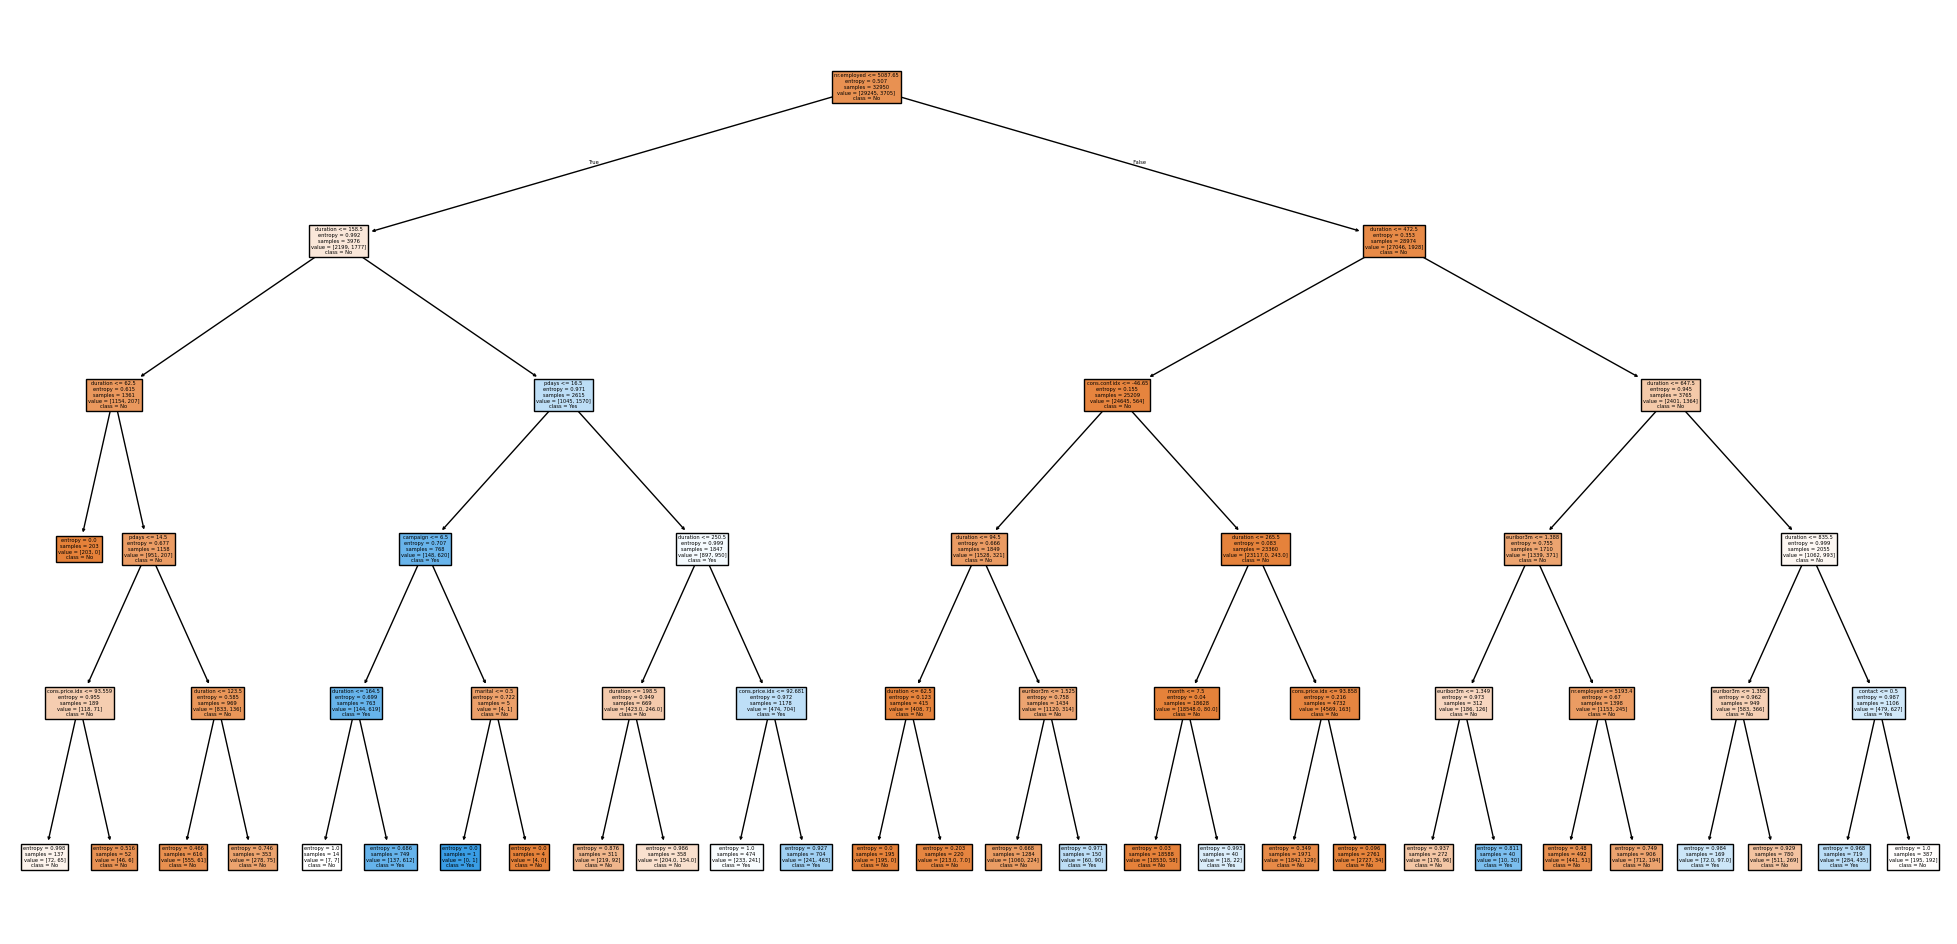

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Please upload the Bank Marketing dataset (bank-additional-full.csv)")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name, sep=';')


label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le


X = data.drop('y', axis=1)
y = data['y']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(25, 12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.show()
